### Import things

In [14]:
# Numerical
import numpy as np
import pandas as pd
from scipy import stats 


# Tools
import csv


# Visualization
import matplotlib.pyplot as plt
%matplotlib inline
#%matplotlib qt
import seaborn as sns


### Importing data

My csv file is in the form of: 

*Time* (in seconds), *Iteration* (iteration counter), *Temperature* (for SA metaheuristic), *Penalty* (including the **cardinality** of the students)

In [15]:
# READ THE COMMENTS BELOW THE FUNCTIONS

def importData(folder, filename):
    try:
        data = pd.read_csv(folder + filename)
        minimum_penalty = data['Penalty'].min()
        minimum_penalty_iteration = data.loc[data['Penalty'] == minimum_penalty, 'Iteration']

        return data, minimum_penalty, minimum_penalty_iteration
    
    except FileNotFoundError as e:
        print(f"From importData: file {filename} doesn't exist")

        
def searchData(l, first_instance, last_instance, folder):
    for i in range(first_instance, last_instance + 1):
        try:
            name = "instance0"+ str(i) + "_" + "DMOgroup01.stat.csv"
            SA_data, minimum_penalty, minimum_penalty_iteration = importData(directory, name)
            num_min = max(minimum_penalty.shape, minimum_penalty_iteration.shape)[0]
            data_dict = {'SA_data': SA_data, 'minimum_penalty': minimum_penalty, 'minimum_penalty_iteration': minimum_penalty_iteration, 'num_min': num_min}
            l.append(data_dict)
        except (ValueError, TypeError) as e:
            print("From searchData: ", e)
            print()
        


# You only need to specify a directory and create a list.
# Then pass the list and the directory to searchData() and specify the instances you want, for example
# from 1 to 5, or from 1 to 8...
directory = "/Users/lpdef/Desktop/Polito/Decision making and optimization/Assignment/instances/"

data_list = []

# This will search from instance 1 to instance 8 (included)
searchData(data_list, 1, 8, directory)

data_size = len(data_list)


### Plotting data

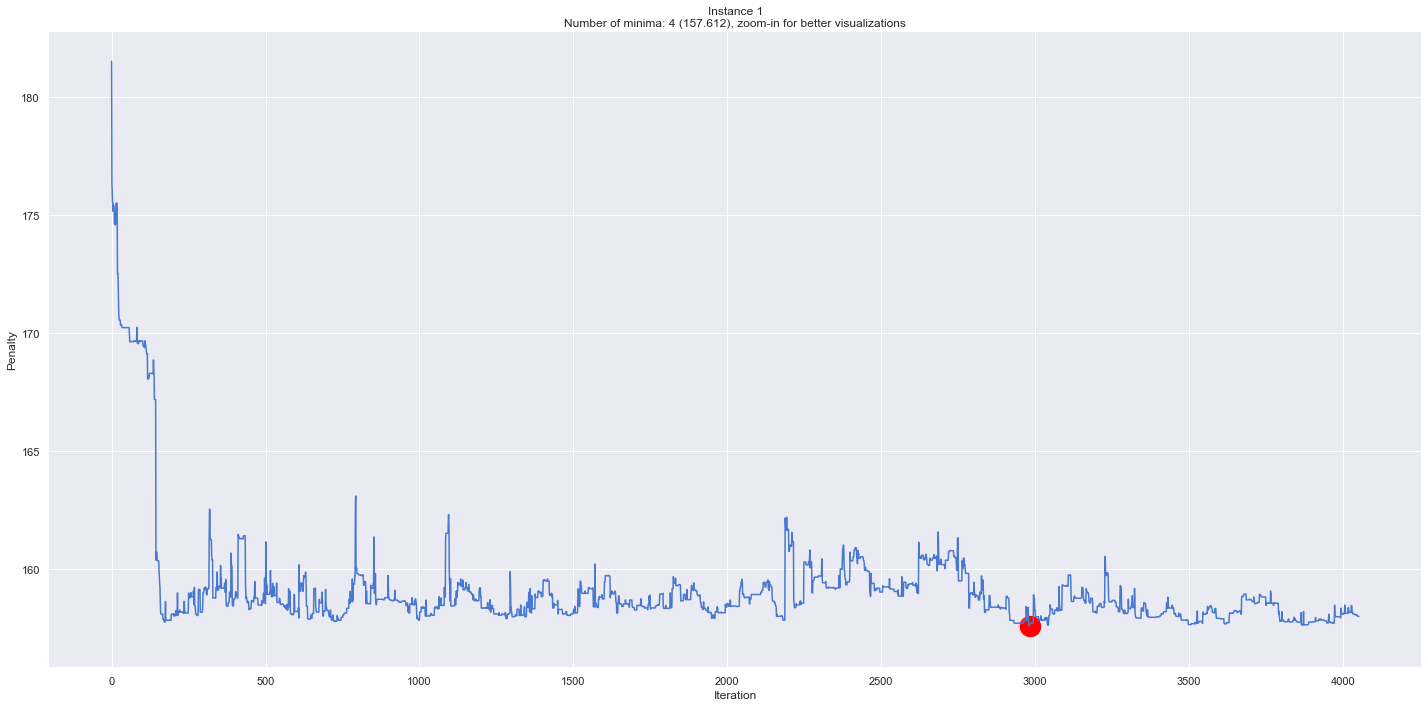

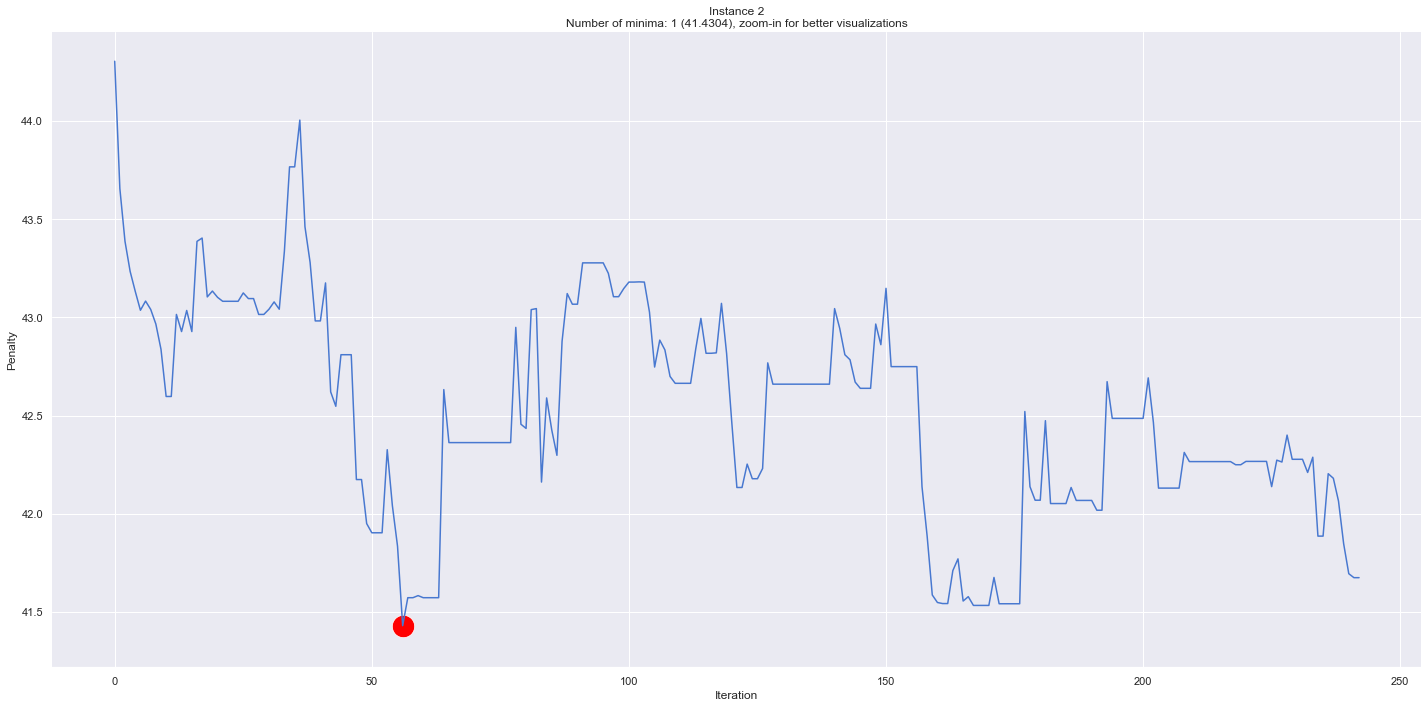

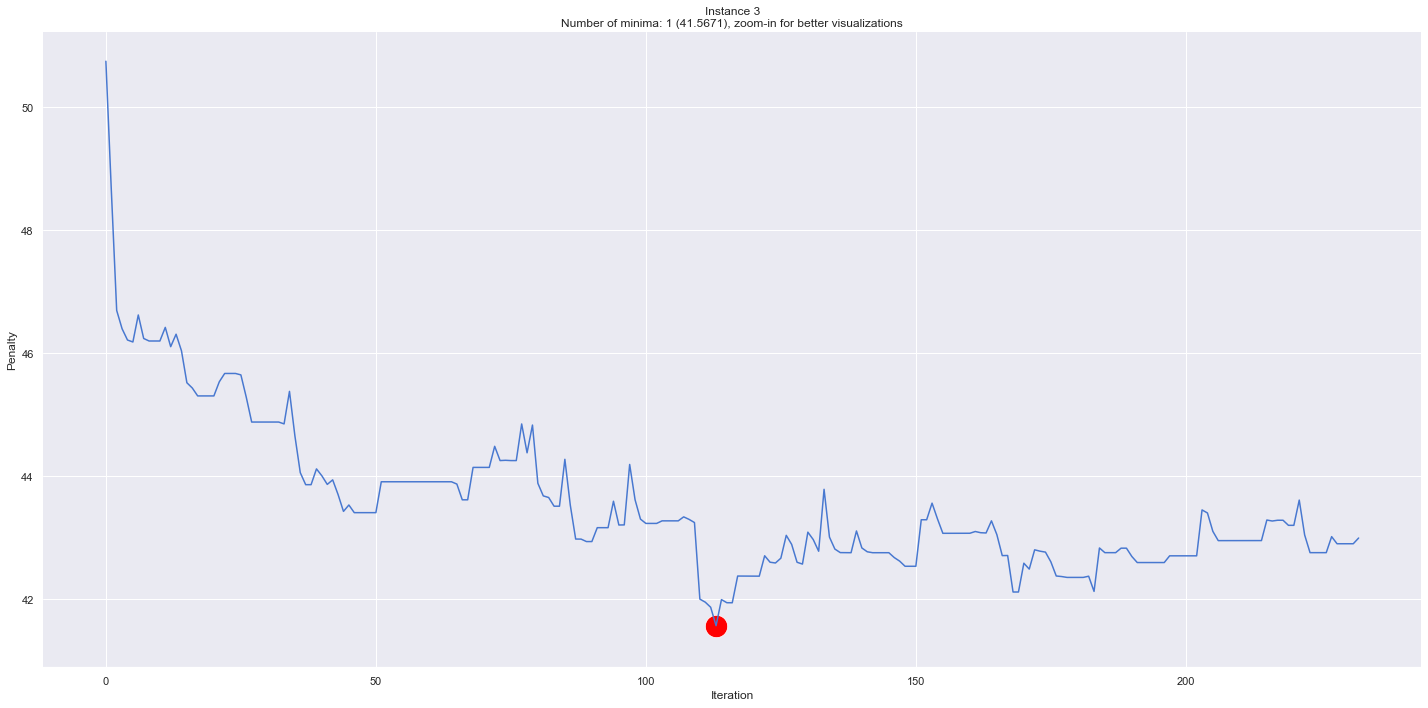

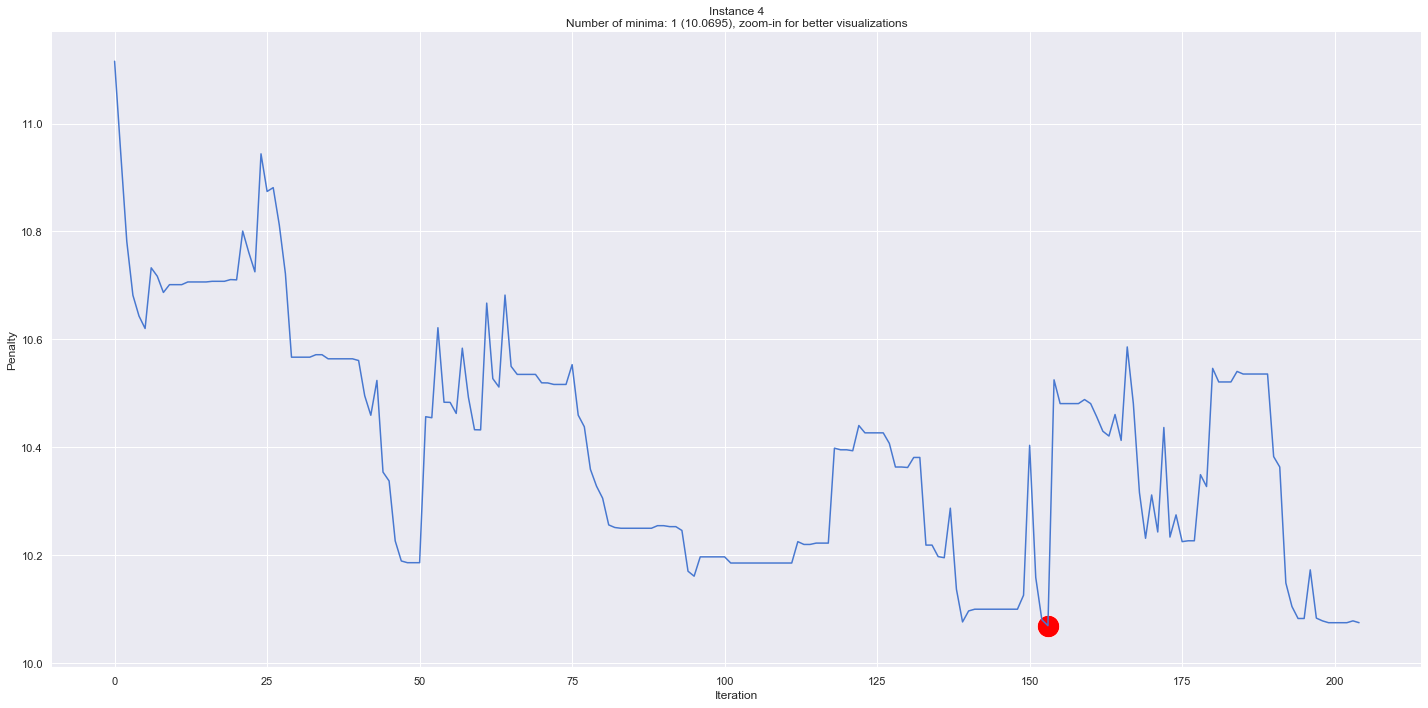

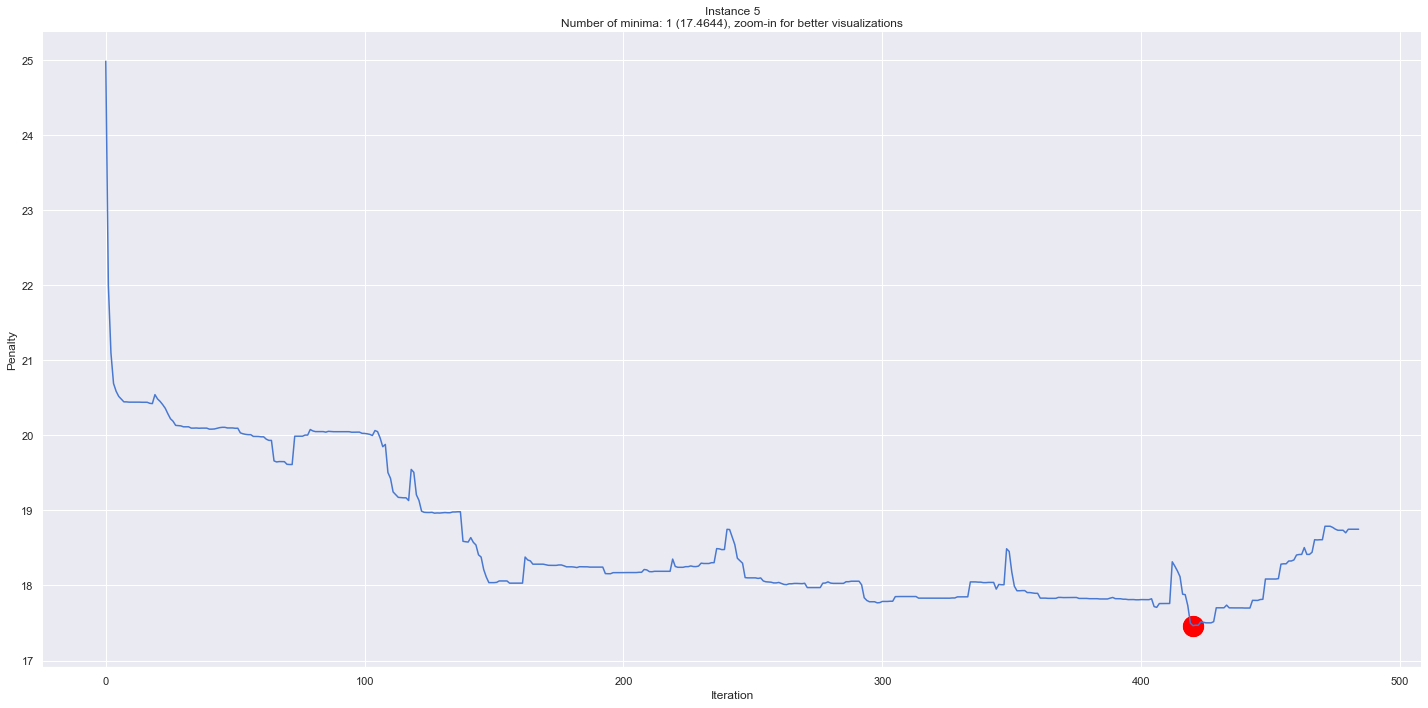

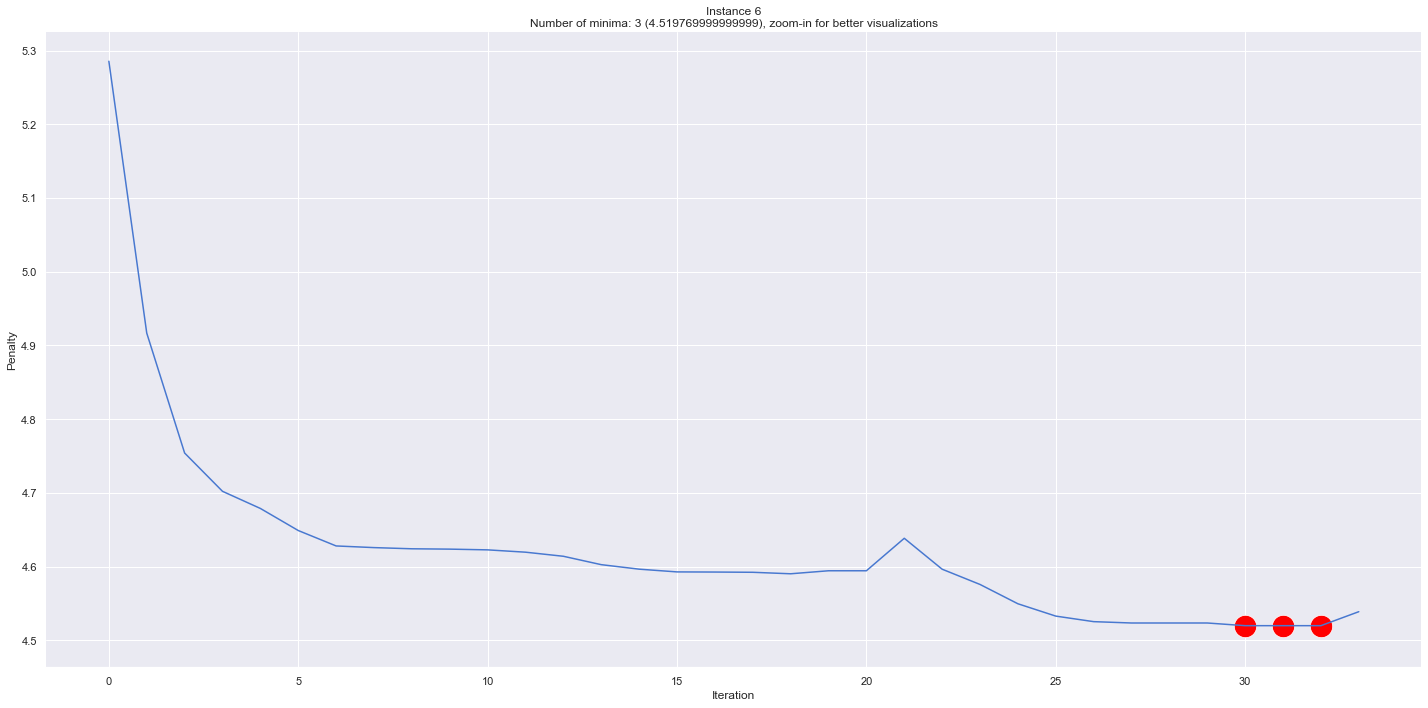

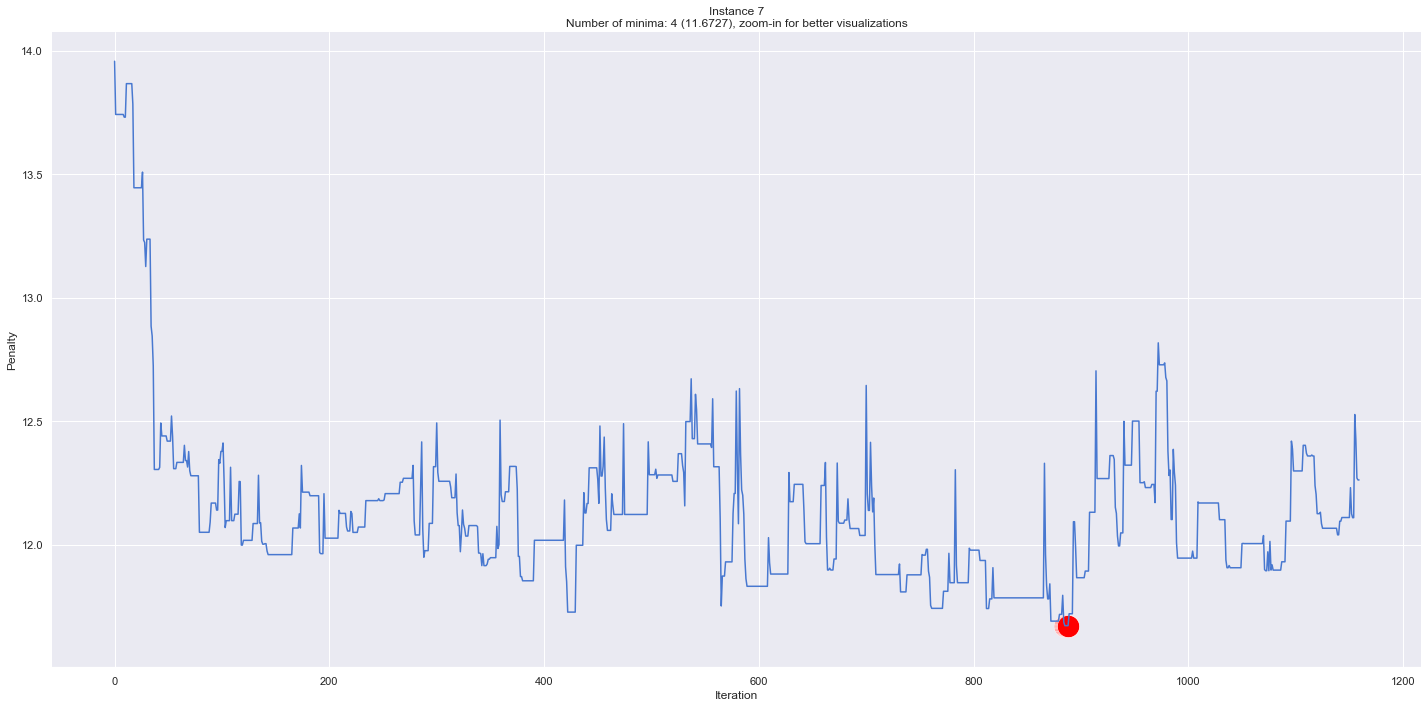

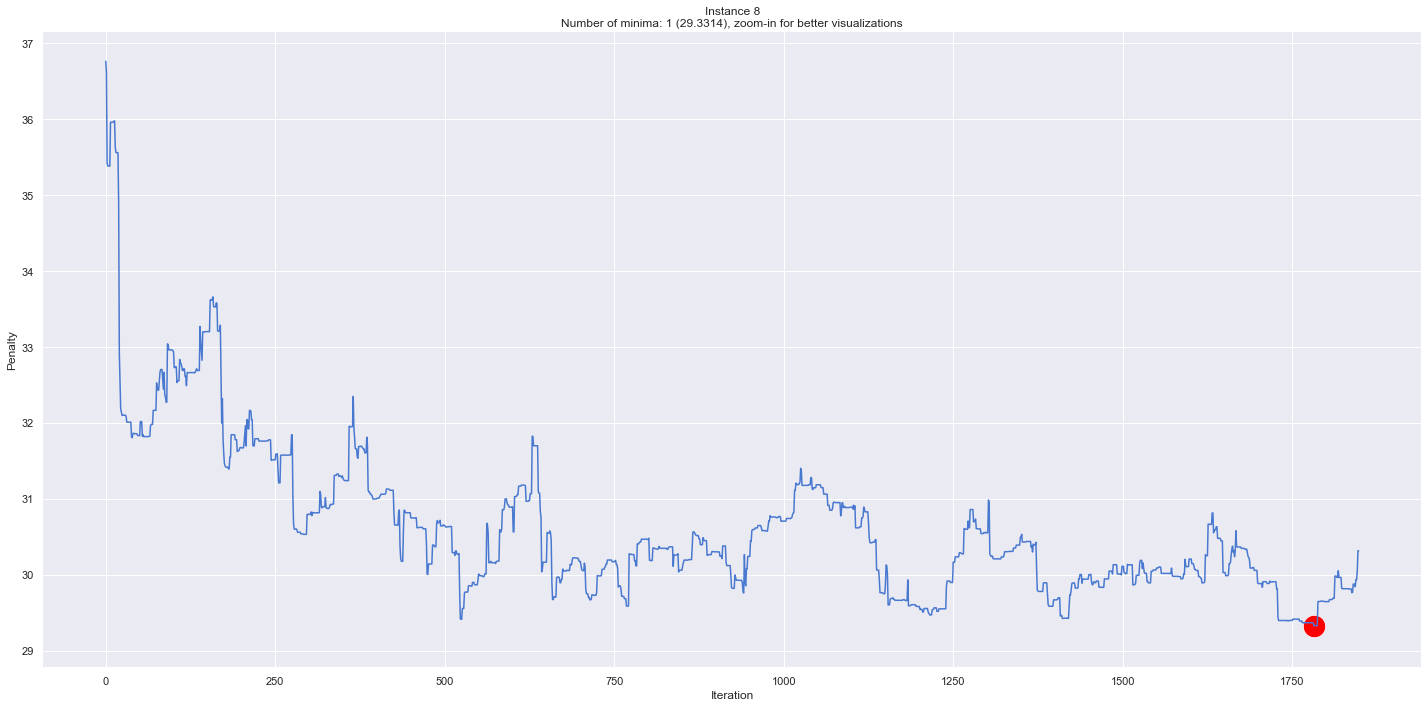

In [16]:
# Plot the data, shortcuts for interactive mode (uncoment "%matplotlib qt" in "import things
# and comment "%matplotlib inline"):
# press 'o' on the keyboard, select a region with the left click to zoom-in, right click to zoom-out,
# press 'h' on the keyboard to reset the figure
# use the menu arrows to navigate through your selections/zoom-ins/zoom-outs...
def plotData(data, min_x, min_y, num_of_minima, scatter_size, instance_number):
    sns.set(style="darkgrid", palette="muted", color_codes=True)

    # Set up the matplotlib figure
    fig, ax1 = plt.subplots(figsize=(20, 10))
    sns.despine(left=True)

    sns.lineplot(x='Iteration', y='Penalty', data = data, ax=ax1)
    
    title = "Instance "+ str(instance_number) + "\nNumber of minima: " + (str)(num_of_minima) + " (" + str(min_y) + ")" + ", zoom-in for better visualizations"
    sns.scatterplot(x=min_x, y = min_y, color = 'red', s=scatter_size, ax=ax1).set_title(title)
    
    plt.tight_layout()
    

def plot_n_figures(l, first, last, scatter_size):   
    for i in range(first-1, last):
        plotData(l[i]['SA_data'], l[i]['minimum_penalty_iteration'], l[i]['minimum_penalty'], l[i]['num_min'], scatter_size, i+1)


# This will plot from instace 1 to instance 8 included        
plot_n_figures(data_list, 1, 8, 500)
